In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsforecast import StatsForecast
from statsforecast.models import CrostonOptimized

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/danielpayne/anaconda3/envs/flashscore/lib/python3.10/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
df = pd.read_csv('data/intermittent_time_series.csv')
print(df.shape)
df.head()

(100, 3)


,unique_id,ds,y
0,1,2023-01-01 00:00:00,43
1,1,2023-01-01 01:00:00,87
2,1,2023-01-01 02:00:00,89
3,1,2023-01-01 03:00:00,87
4,1,2023-01-01 04:00:00,73


## ADIDA 

In [5]:
# Model with ADIDA and Croston
from statsforecast.models import ADIDA

models = [CrostonOptimized(), ADIDA()]

sf = StatsForecast(
    df=df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

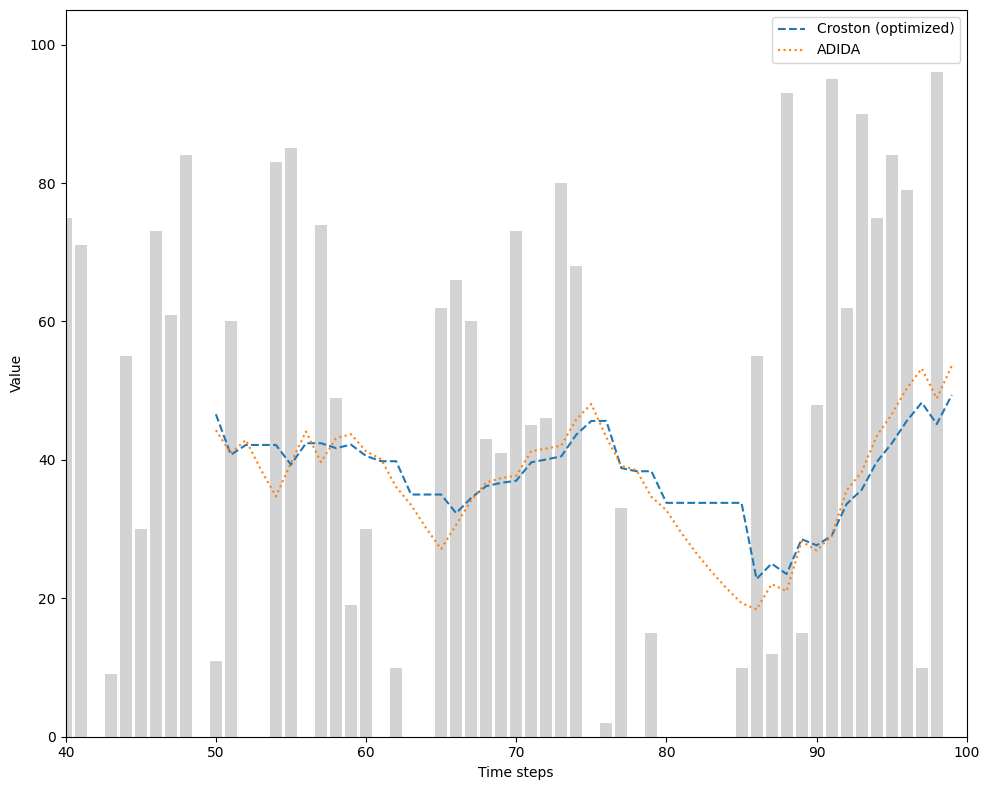

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(df.index, df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['CrostonOptimized'], ls='--', label='Croston (optimized)')
ax.plot(cv_df.index, cv_df['ADIDA'], ls=':', label='ADIDA')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()

In [8]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error

mae_croston = mean_absolute_error(cv_df.y, cv_df.CrostonOptimized)
mae_adida = mean_absolute_error(cv_df.y, cv_df.ADIDA)


print(f'MAE Croston: {mae_croston}')
print(f'MAE ADIDA: {mae_adida}')

MAE Croston: 31.68775177001953
MAE ADIDA: 30.451702117919922


## IMAPA 

In [9]:
# Model with IMAPA and ADIDA
from statsforecast.models import IMAPA

models = [ADIDA(), IMAPA()]


sf = StatsForecast(
    df=df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

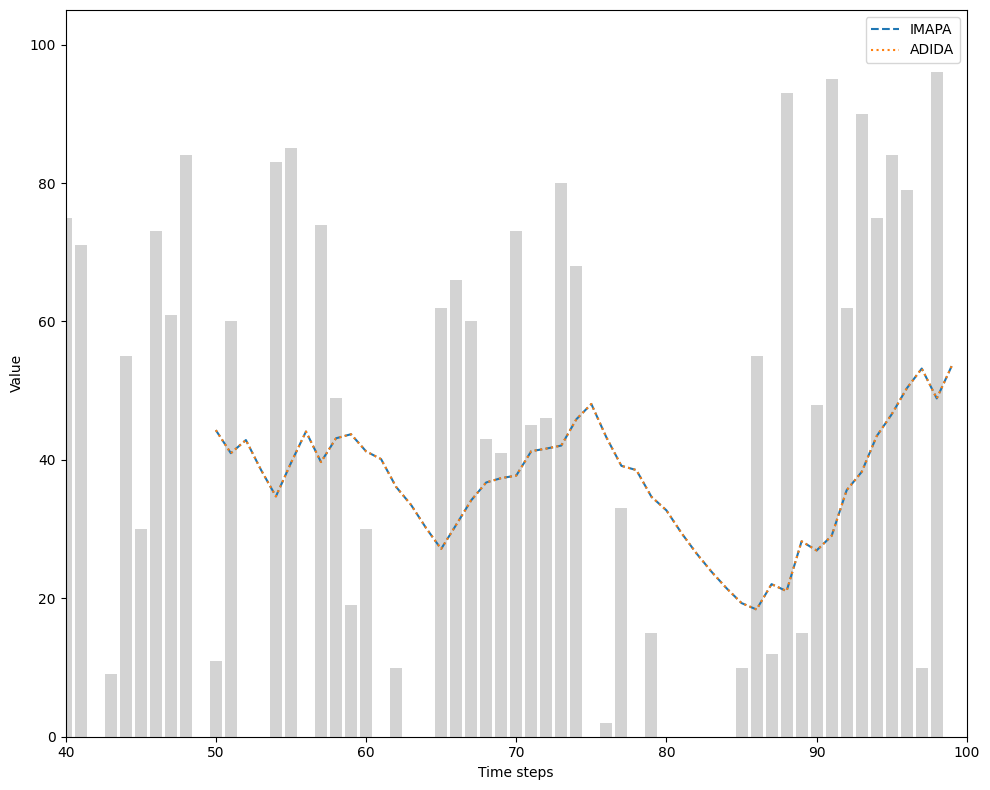

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(df.index, df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['IMAPA'], ls='--', label='IMAPA')
ax.plot(cv_df.index, cv_df['ADIDA'], ls=':', label='ADIDA')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()

In [12]:
mae_imapa = mean_absolute_error(cv_df['y'], cv_df['IMAPA'])
mae_adida = mean_absolute_error(cv_df['y'], cv_df['ADIDA'])

print(f'MAE IMAPA: {mae_imapa}')
print(f'MAE ADIDA: {mae_adida}')

MAE IMAPA: 30.451702117919922
MAE ADIDA: 30.451702117919922
